In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

In [2]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ 0.43986153, -0.3824161 ,  2.96955926,  3.54333237,  3.75794794,
        4.33560136,  5.37058276,  7.69881584, 10.27860474, 10.73297   ])

In [3]:
y_label=np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([ 1.12738993,  1.43306779,  1.28949967,  4.67143653,  4.62633409,
        6.54657359,  5.46640026,  8.67121005, 10.35083466, 10.25350013])

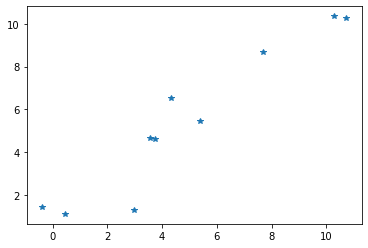

In [4]:
plt.plot(x_data,y_label,'*')

# y = mx + b

In [5]:
val=np.random.rand(2)
val

array([0.67201714, 0.83784802])

In [6]:
m=tf.Variable(val[0])

b=tf.Variable(val[1])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
# Cost Function

error=0
for x,y in zip(x_data,y_label):
    
    y_pred=m*x+b
    error+=(y-y_pred)**2

In [8]:
# Optimizer (Gradient descent)

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [9]:
init=tf.compat.v1.global_variables_initializer()

In [10]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    epochs = 100
    for i in range(epochs):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

In [11]:
print(final_slope,"\n",final_intercept)

0.9121853461376924 
 0.9649288000463755


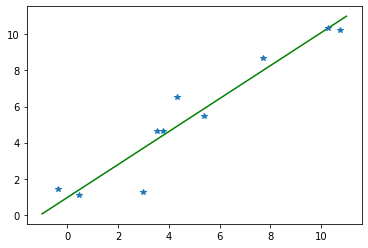

In [12]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test+final_intercept

plt.plot(x_test,y_pred_plot,'g')

plt.plot(x_data,y_label,'*')